# Question 1

Health claim amounts and the GB family of distributions. For this problem, you will use 10,619 health claims amounts from a fictitious sample of households. These data are in a single column of the text file clms.txt in the WK5 StrEst folder. Health claim amounts are reported in U.S. dollars. For this exercise, you will need to use the generalized beta family of distributions shown in the figure in Section 7 of your MLE Jupyter notebook.

a) Calculate and report the mean, median, maximum, minimum, and stan- dard deviation of monthly health expenditures for these data. Plot two histograms of the data in which the y-axis gives the percent of observations in the particular bin of health expenditures and the x-axis gives the value of monthly health expenditures. Use percentage histograms in which the height of each bar is the percent of observations in that bin (see instruc- tions in Jupyter notebook PythonVisualize.ipynb in Section 1.2). In the first histogram, use 1,000 bins to plot the frequency of all the data. In the second histogram, use 100 bins to plot the frequency of only monthly health expenditures less-than-or-equal-to $800 (xi ≤ 800). Adjust the fre- quencies of this second histogram to account for the observations that you have not displayed (xi > 800). That is, the heights of the histogram bars in the second histogram should not sum to 1 because you are only display- ing a fraction of the data. Comparing the two histograms, why might you prefer the second one?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as sts
import scipy.optimize as opt
from scipy import integrate
import pandas as pd

In [3]:
claims = np.loadtxt('clms.txt')

In [4]:
print("Mean: ", claims.mean())
print("Median: ", np.median(claims))
print("Max: ", claims.max())
print("Min: ", claims.min())
print("Standard Deviation: ", claims.std())

Mean:  720.2779753272437
Median:  172.21
Max:  227967.25
Min:  0.01
Standard Deviation:  3972.663756393663


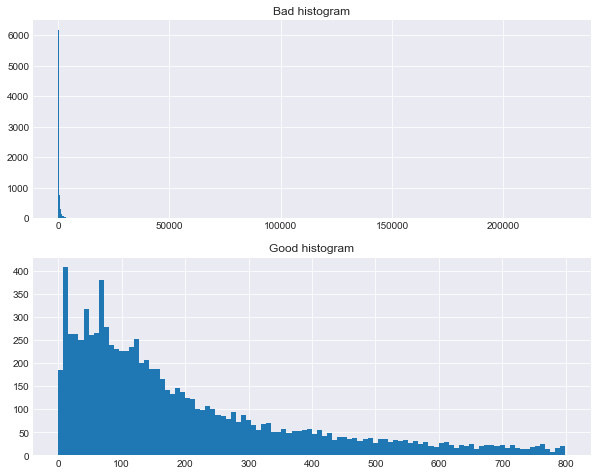

In [5]:
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(2,1, figsize=(10,8))
palette = plt.get_cmap('Dark2')

axes[0].hist(claims, bins=1000)
axes[0].set_title('Bad histogram')
axes[1].hist(claims[claims<=800], bins=100)
axes[1].set_title('Good histogram')

plt.show()

b) Using MLE, fit the gamma GA(x; α, β) distribution to the individual ob-
servation data. Use β0 = V ar(x)/E(x) and α0 = E(x)/β0 as your initial
 guess.1 Report your estimated values for αˆ and βˆ, as well as the value of ˆ
the maximized log likelihood function ln L(θ). Plot the second histogram from part (a) overlayed with a line representing the implied histogram from your estimated gamma (GA) distribution.

In [6]:
def gamma_pdf(x, alpha, beta):
    """ Probability of x in GA(a,b)"""
    gamma = scipy.special.gamma(alpha)
    pdf = (1 / ((beta ** alpha) * gamma)) * (x ** (alpha-1)) * (np.exp(-(x / beta)))
    return pdf

def log_like(params, *args):
    """ Computes the log_likelyhood of of data given paramaters.
    Params: alpha, beta of gamma distribution
    *args: data points
    
    Returns: a likelyhood score
    """
    alpha, beta = params
    data = args
    probabilities = gamma_pdf(data, alpha, beta)
    ln_probabilities = np.log(probabilities)
    neg_ln_likelyhood = - ln_probabilities.sum()    # negate so we can optimize

    return neg_ln_likelyhood

In [7]:
beta_guess = claims.var() / claims.mean()
alpha_guess = claims.mean() / beta_guess
initial_guess = (alpha_guess, beta_guess)

results = opt.minimize(log_like, initial_guess, args=(claims), method ='L-BFGS-B',bounds=((1e-5, None), (1e-5, None)))

gamma_alpha_hat, gamma_beta_hat = results.x
max_likelyhood = results.fun

print("Alpha-hat is: ", gamma_alpha_hat, "\nBeta-hat is: ",gamma_beta_hat)
print("Maximum likelyhood is: ", max_likelyhood)

Alpha-hat is:  0.22175532272679777 
Beta-hat is:  21911.064699249375
Maximum likelyhood is:  82076.45160566256


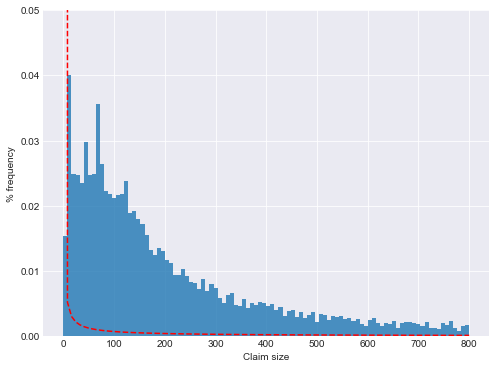

In [8]:
weights = (1 / claims.size) * np.ones_like(claims)
domain = np.linspace(1e-5,800,100)

plt.figure(figsize=(8, 6))
plt.hist(claims, bins=100, range=(0, 800), weights=weights, alpha=0.8)

plt.plot(domain, gamma_pdf(domain, gamma_alpha_hat, gamma_beta_hat), 'r--')
plt.ylim(0, 0.05)
plt.ylabel('% frequency')
plt.xlabel('Claim size')
plt.show()

(c) Using MLE, fit the generalized gamma GG(x; α, β, m) distribution to the individual observation data. Use your estimates for α and β from part(b), as well as m = 1, as your initial guess. Report your estimated values for αˆ, βˆ, and mˆ, as well as the value of the maximized log likelihood function ln L. Plot the second histogram from part (a) overlayed with a line representing the implied histogram from your estimated generalized gamma (GG) distribution.

In [9]:
def gg_pdf(data, alpha, beta, m):
    """ Pdf of the generalized gamma distro, parameters= alpha, beta, m
    returns a probability
    """
    gamma = scipy.special.gamma(alpha)
    pdf = (m / ((beta ** alpha) * gamma)) * (data ** (alpha - 1)) * (np.exp(-(data / beta) ** m))
    return pdf

def log_likely(params, *args):
    
    alpha, beta, m = params
    data = args
    
    probabilities = gg_pdf(data, alpha, beta, m)
    ln_probabilities = np.log(probabilities)
    neg_log_likely = - ln_probabilities.sum() #negative so we can use minimizer
    return neg_log_likely

initial_guess = [alpha_hat, beta_hat, 1]
results = opt.minimize(log_likely, initial_guess, args=(claims), method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None), (1e-5, None)))

gg_alpha_hat, gg_beta_hat, gg_m_hat = results.x
max_likelyhood = results.fun
    
print("Alpha-hat is: ", gg_alpha_hat, "\nBeta-hat is: ",gg_beta_hat, "\nm-hat is: ", gg_m_hat)
print("Maximum likelyhood is: ", max_likelyhood)    

NameError: name 'alpha_hat' is not defined

In [ ]:
domain = np.linspace(1e-5, 800, 100)
weights = (1 / claims.size) * np.ones_like(claims)

plt.figure(figsize=(8, 6))
plt.hist(claims, bins=100, range=(0, 800), weights=weights)

plt.plot(domain, gg_pdf(domain, gg_alpha_hat, gg_beta_hat, gg_m_hat), 'r--')
plt.ylim(0, 0.05)
plt.ylabel('% frequency')
plt.show()

## question d
Using MLE, fit the generalized beta 2 GB2(x; a, b, p, q) distribution to the individual observation data. Use your estimates for α, β, and m from part (c), as well as q = 200, as your initial guess. Report your estimated values for aˆ, ˆb, pˆ, and qˆ, as well as the value of the maximized log likelihood function lnL. Plot the second histogram from part(a) overlayed with a line representing the implied histogram from your estimated generalized beta 2 (GB2) distribution.

In [ ]:
def gb2_pdf(data, alpha, beta, p, q): 
    '''Generalized beta2 distribution'''
    numer = alpha * data **(alpha * p - 1)
    denom  = beta ** (alpha * p) * scipy.special.beta(p, q) * (1 + (data / beta) ** alpha) ** (p + q)
    return numer / denom

def log_likely(params, *args):
    
    alpha, beta, m, p = params
    data = args
    
    probabilities = gb2_pdf(data, alpha, beta, m, p)
    ln_probabilities = np.log(probabilities)
    neg_log_likely = - ln_probabilities.sum() #negative so we can use minimizer
    return neg_log_likely

In [ ]:
beta_guess = beta_hat * 200 ** (1 / m_hat)  # initial guess at b
alpha_guess = m_hat  # initial guess at a
p_guess = alpha_hat / beta_hat
q_guess = 200

gb2_guess = np.array([alpha_guess, beta_guess, p_guess, q_guess])


initial_guess = np.array(gb2_guess)
results = opt.minimize(log_likely, initial_guess, args=(claims), method ='L-BFGS-B',
                       bounds=((1e-5, None), (1e-5, None), (1e-5, None), (1e-5,None)))

gb2_alpha_hat, gb2_beta_hat, gb2_q_hat, gb2_p_hat = results.x
max_likelyhood = results.fun
    
print("Alpha-hat is: ", gb2_alpha_hat, "\nBeta-hat is: ",gb2_beta_hat, "\nq-hat is: ", gb2_q_hat, "\np-hat is: ", gb2_p_hat)
print("Maximum likelyhood is: ", max_likelyhood)   

In [ ]:
domain = np.linspace(1e-5, 800, 100)
weights = (1 / claims.size) * np.ones_like(claims)

plt.figure(figsize=(8, 6))
plt.hist(claims, bins=100, range=(0, 800), weights=weights)

plt.plot(domain, gb2_pdf(domain, gb2_alpha_hat, gb2_beta_hat, gb2_q_hat, gb2_p_hat), 'r--')
plt.ylim(0, 0.05)
plt.ylabel('% frequency')
plt.show()

## part e
Perform a likelihood ratio test for each of the estimated in parts (b) and (c), respectively, against the GB2 specification in part (d). This is feasible because each distribution is a nested version of the GB2. The degrees of freedom in the χ2(p) is 4, consistent with the GB2. Report the χ2(4) values from the likelihood ratio test for the estimated GA and the estimate GG.


$$ LR(\tilde{\theta}|\hat{\theta}_{MLE}) = 2\Bigl(\ln\ell(\hat{\theta}_{MLE}) - \ln\ell(\tilde{\theta})\Bigr) \sim \chi^2(p) $$


In [ ]:
data = claims

ln_likely_gam = np.log(gamma_pdf(data, gamma_alpha_hat, gamma_beta_hat))
ln_likely_gg = np.log(gg_pdf(data, gg_alpha_hat, gg_beta_hat, gg_m_hat))
ln_likely_gb2 = np.log(gb2_pdf(data, gb2_alpha_hat, gb2_beta_hat, gb2_q_hat, gb2_p_hat))

# Gamma
LR_value_gamma = 2 * (ln_likely_gb2.sum() - ln_likely_gam.sum())
pval_gamma = 1.0 - sts.chi2.cdf(LR_value_gamma, 2)

# Generalized Gamma
LR_value_gg = 2 * (ln_likely_gb2.sum() - ln_likely_gg.sum())
pval_gg = 1.0 - sts.chi2.cdf(LR_value_gg, 2)

print("P-value for Gamma is: ", pval_gamma)
print("P-value for Generalized-Gamma is: ", pval_gamma)

## part f
Using the estimated GB2 distribution from part (d), how likely am I to have a monthly health care claim of more than $1,000? How does this amount change if I use the estimated GA distribution from part (b)?

In [ ]:
cdf_GB2_1000 = integrate.quad(gb2_pdf,1000, np.inf
                               ,args=(gb2_alpha_hat, gb2_beta_hat, gb2_q_hat, gb2_p_hat))
                                                              
cdf_gamma_1000 = integrate.quad(gamma_pdf, 1000, np.inf,
                              args=(gamma_alpha_hat, gamma_beta_hat))

print("CDF, GB2 of healthcare claim above 1000: ", cdf_GB2_1000[0])
print("CDF, Gamma of healthcare claim above 1000: ", cdf_gamma_1000[0])

## Question 2

In [26]:
macro = pd.read_csv('MacroSeries.txt', header=None)
macro.columns = ['ct', 'kt', 'wt', 'rt', 'yt']

def find_z(w, k, alpha):
    """Given data and a param alpha, find z"""
   
    z_series = np.log(w / ((1 - alpha) *(k ** alpha)))
    return z_series

def log_likely(params, *args):
    alpha, rho, mu, sigma = params
    w, k = args
    
    z_guess = find_z(w, k, alpha)
    
    probabilities = np.zeros(z_guess.size)
    for ii, zz in enumerate(z_guess):
        if ii == 0:
            loc = rho * mu + (1 - rho)* mu
        else:
            loc = rho * z_guess[ii-1] + (1 - rho)* mu
            
        probabilities[ii] = sts.norm.pdf(zz, loc=loc, scale=sigma) 
    
    ln_probabilities = np.log(probabilities)
    neg_ln_likelyhood = - ln_probabilities.sum()
    return neg_ln_likelyhood

args = (macro['wt'], macro['kt'])
param_guess = [0.4, 0.4, 5, 0.8]

resultsA = opt.minimize(log_likely, param_guess, args=args, method ='L-BFGS-B',
                       bounds=((1e-5, 1), (-1, 1), (1e-5, None), (1e-5,None)))

print("My solution is: ", resultsA.x)
print("My Inverse-Hessian is: ", resultsA.hess_inv)

/Users/alexweinberg/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in subtract
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/alexweinberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/Users/alexweinberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


My solution is:  [0.81784005 0.59297047 5.08076849 1.10241299]
My Inverse-Hessian is:  <4x4 LbfgsInvHessProduct with dtype=float64>


/Users/alexweinberg/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


## part c

 estimate the four parameters (α,ρ,μ,σ) by maximum likelihood. 
    Given a guess for the parameters (α, ρ, μ, σ), you can use the two variables from the data (rt,kt) and (4) to back out a series for zt. 
    You can then use equation (5) to compute the probability
of each zt ∼ N ρzt−1 + (1 − ρ)μ, σ2 . The maximum likelihood estimate
(αˆ,ρˆ,μˆ,σˆ) maximizes the likelihood function of that normal distribution of zt’s. 
Report your estimates and the inverse hessian variance-covariance matrix of your estimates.

In [25]:
def find_z(r, k, alpha):
    """given data, param_guess spit out z-series"""
    z = np.log(r / (alpha *((k)**(alpha-1)))) 
    return z

def log_likely(params, *args):
    alpha, rho, mu, sigma = params
    r, k = args
    
    z_guess = find_z(r, k, alpha)
    
    probabilities = np.zeros(z_guess.size)
    for ii, zz in enumerate(z_guess):
        if ii == 0:
            loc = rho * mu + (1 - rho)* mu
        else:
            loc = rho * z_guess[ii-1] + (1 - rho)* mu
            
        probabilities[ii] = sts.norm.pdf(zz, loc=loc, scale=sigma) 
    
    ln_probabilities = np.log(probabilities)
    neg_ln_likelyhood = - ln_probabilities.sum()
    return neg_ln_likelyhood


args = (macro['rt'], macro['kt'])
param_guess = [0.81, 0.59, 5.08, 1.1]

resultsB = opt.minimize(log_likely, param_guess, args=args, method ='L-BFGS-B',
                       bounds=((1e-5, 1), (-1, 1), (1e-5, None), (1e-5,None)))

print("My solution is: ", resultsB.x)
print("My Inverse-Hessian is: ", resultsB.hess_inv)

/Users/alexweinberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/Users/alexweinberg/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


My solution is:  [0.76858978 0.77025307 3.63079287 0.61476131]
My Inverse-Hessian is:  <4x4 LbfgsInvHessProduct with dtype=float64>


## part c
According to your estimates from part (a), if investment/savings in the
current period is kt = 7, 500, 000 and the productivity shock in the previous
period was zt−1 = 10, what is the probability that the interest rate this ˆ
period will be greater than rt = 1. That is, solve for P r(rt > 1|θ, kt, zt−1). [HINT: Use equation (4) to solve for the zt = z∗ such that rt = 1. Then use (5) to solve for the probability that zt > z∗.]

In [54]:
def prob(kt=7_500_000, zt1=10, args=resultsA.x):
    alpha, rho, mu, sigma = args
    border_z = find_z(1,k=kt, alpha=alpha)
    
    loc = rho * zt1 + (1 - rho)* mu
    prob_r_ge_1 = sts.norm.sf(border_z, loc=loc, scale=sigma)
    return prob_r_ge_1

print("Probability z>z* s.t. r=1: ", prob())

Probability z>z* s.t. r=1:  1.0


# Question 3

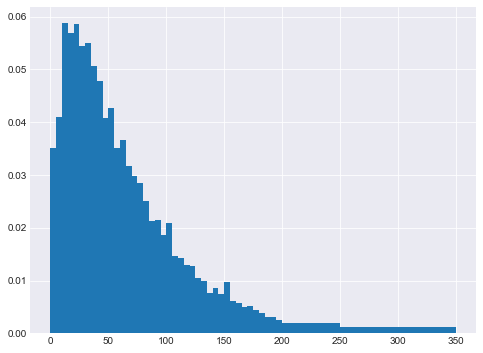

In [90]:
income = pd.read_csv('usincmoms.txt', delimiter ='\t' ,header=None)
income.columns = ['percent', 'mid']

cp_percent = income.percent.copy()
cp_percent[41] = cp_percent[41] / 20
cp_percent[40] = cp_percent[40] / 10

widths = np.ones(42) * 5
widths[41] = 20 * 5
widths[40] = 10 * 5

plt.figure(figsize=(8, 6))
plt.bar(income.mid / 1000, cp_percent, width=widths, align='center')
plt.show()

$$ \text{(LN):}\quad f(x;\mu,\sigma) = \frac{1}{x\sigma\sqrt{2\pi}}e^{-\frac{[\ln(x)-\mu]^2}{2\sigma^2}},\quad x\in(0,\infty), \:\mu\in(-\infty,\infty),\: \sigma>0 $$

$$F(x;\mu ,\sigma )=\left[\left({\frac {e^{\mu }}{x}}\right)^{\pi /(\sigma {\sqrt {3}})}+1\right]^{-1}.$$

In [208]:
def log_normal(x, mu, sigma):
    inner = (np.log(x) - mu) / sigma
    cdf = sts.norm.cdf(inner)    
    return cdf

def pdf_logNormal(x, mu, sigma):
    pdf = np.exp(-((np.log(x) - mu)**2) / (2 * (sigma ** 2))) / (x * sigma * np.sqrt(2 * np.pi))
    return pdf

def model_moments(params, args):
    mu, sigma = params
    data, income_bins = args
    
    topCDF = log_normal(income_bins, mu, sigma)
    bottomCDF = log_normal(np.roll(income_bins, 1), mu, sigma)
    bottomCDF[0] = 0
    
    moments = topCDF - bottomCDF
    return moments

def error(params, args):
    income, income_bins = args
    moms_model = model_moments(params, args) 
    err_vec = moms_model - income.percent.values
    return err_vec
    
def crit(params, *args):
    income, income_bins = args
    e = error(params, args)
    W = np.diag(income.percent.values)
    ans = e.T @ W @ e
    return ans

#Make bin upper bounds
income_bins = np.zeros(42)
income_bins[0] = 5000.0
for i in range(1, 40):
    income_bins[i] = (income.mid[i] + income.mid[i+1]) / 2

income_bins[-2] = 200000.0
income_bins[-1] = 250000.0

param_guess = [10, 1]
args = (income, income_bins)

results = opt.minimize(crit, param_guess, args=args, method ='L-BFGS-B',
                       bounds=((1e-5, None), (1e-5, None)))
mu_hat, sig_hat = results.x
results

      fun: 4.69506980575892e-05
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.81177840e-06, -5.11383131e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 5
   status: 0
  success: True
        x: array([10.86764637,  1.02982643])

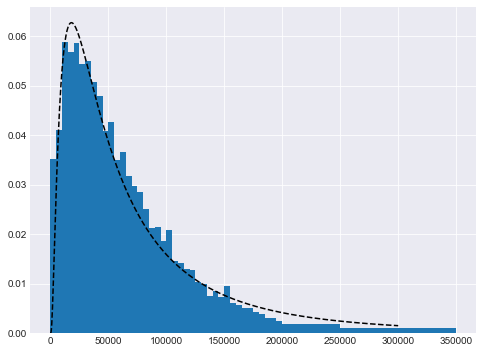

In [224]:
domain = np.linspace(1e-5,300_000,1000)

plt.figure(figsize=(8, 6))
plt.bar(income.mid, cp_percent, width=widths*1000, align='center')
plt.plot(domain, 5000 * pdf_logNormal(domain, mu_hat, sig_hat),'k--')
plt.show()